In [1]:
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
class hierarchical_clustering():
    def __init__(self):
        return


    def linkages(self, data, linkage_type):
        Z = linkage(data, method = linkage_type)
        return Z


    def dendogram(self, Z):
        plt.figure()
        dn = dendrogram(Z)
        return

### 3.1.1 Hierarchical Clustering on New Customers Dataset ###

col =  Genre Unique Values =  2
col =  Age Unique Values =  51
col =  Annual Income (k$) Unique Values =  64
col =  Spending Score (1-100) Unique Values =  84
2
51
64
84


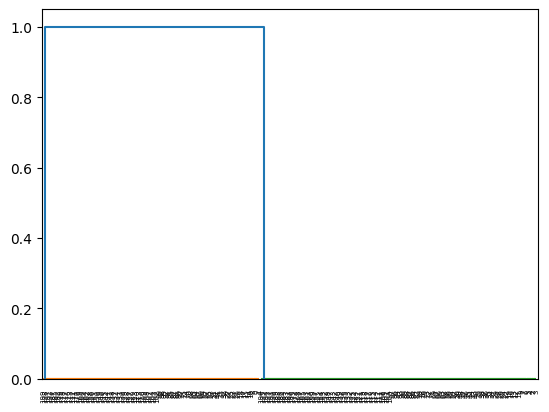

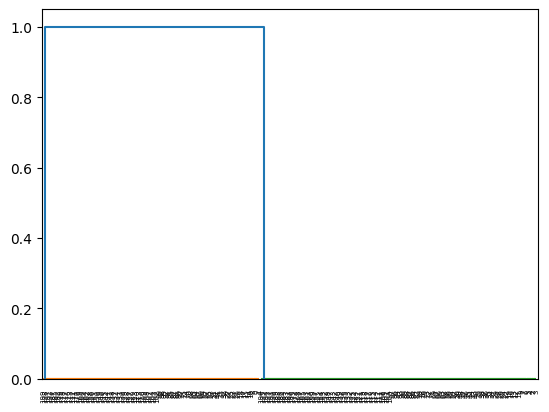

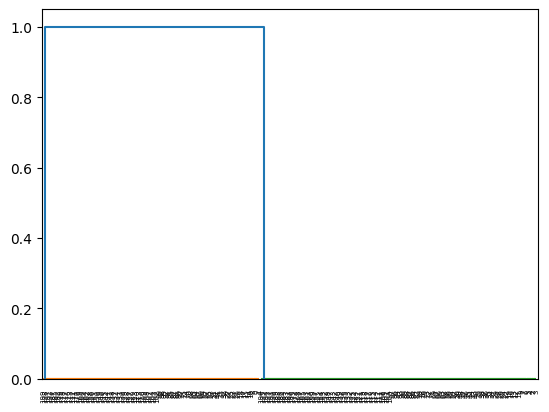

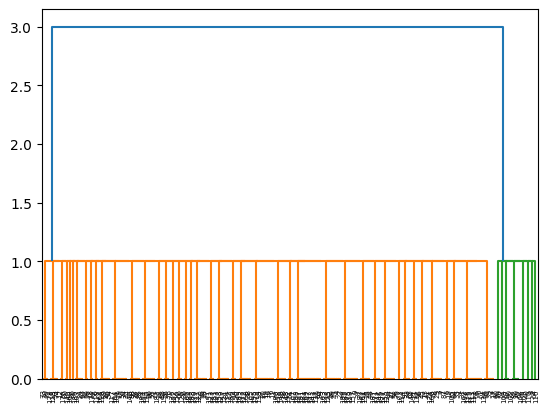

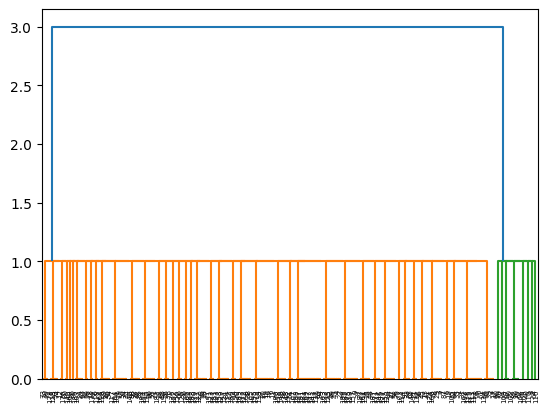

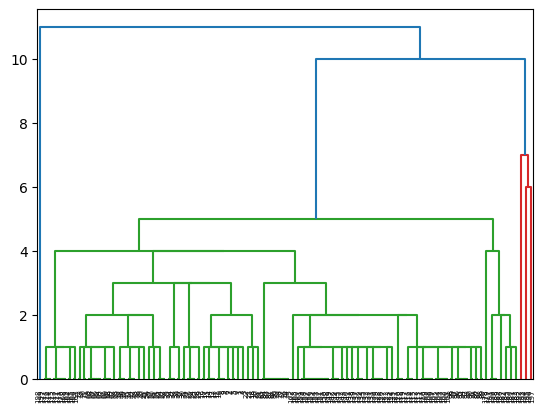

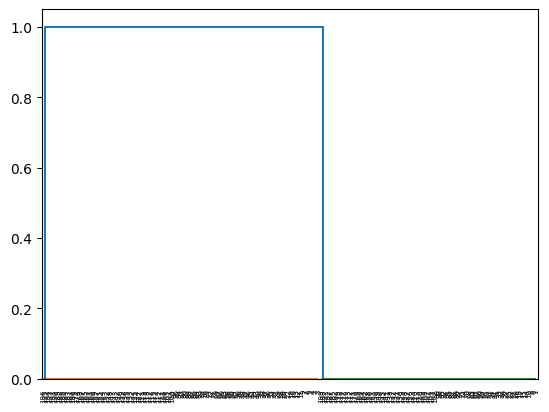

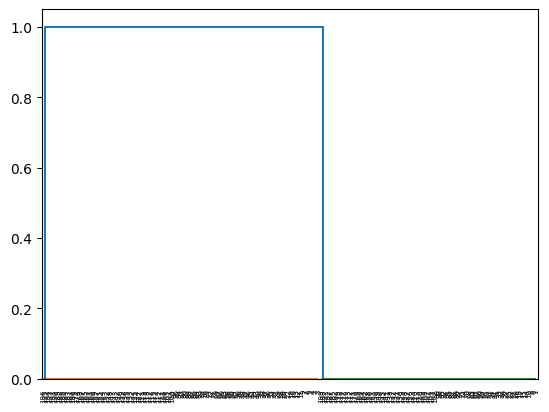

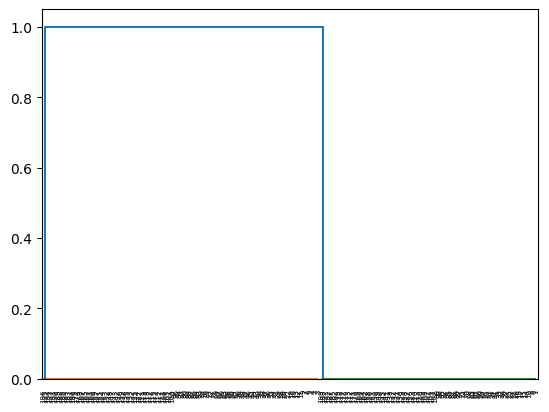

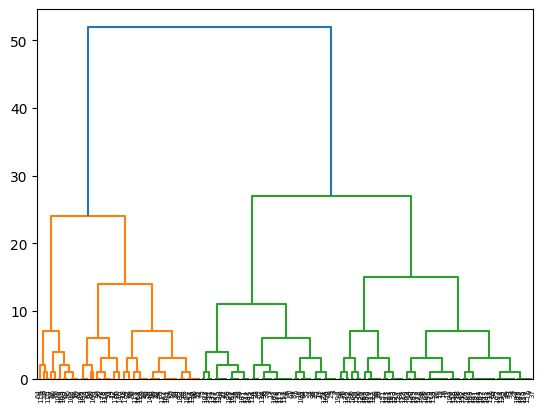

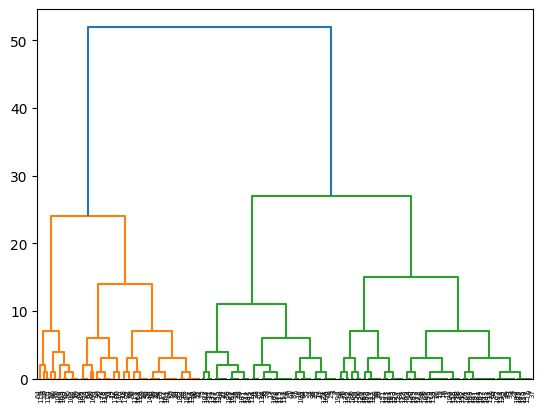

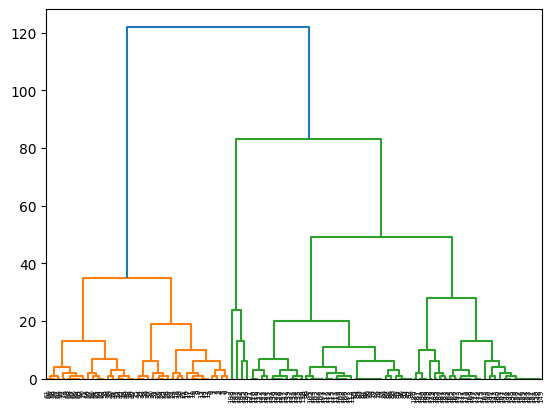

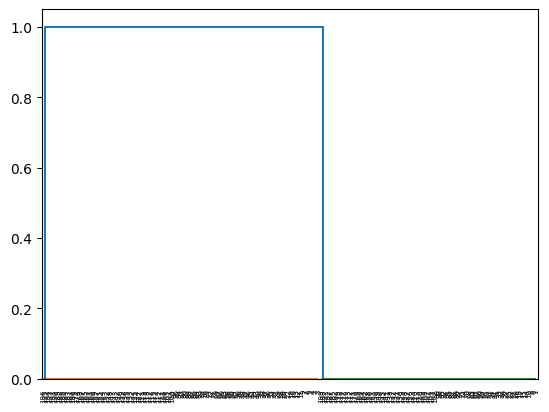

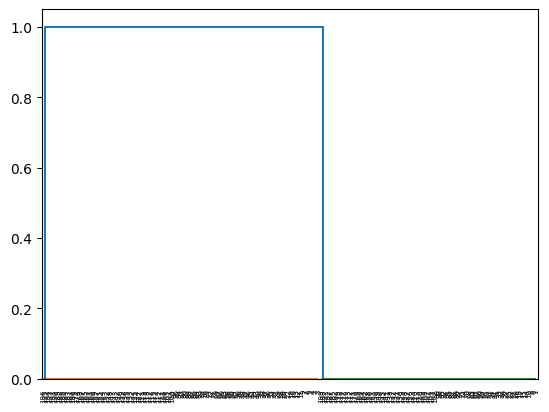

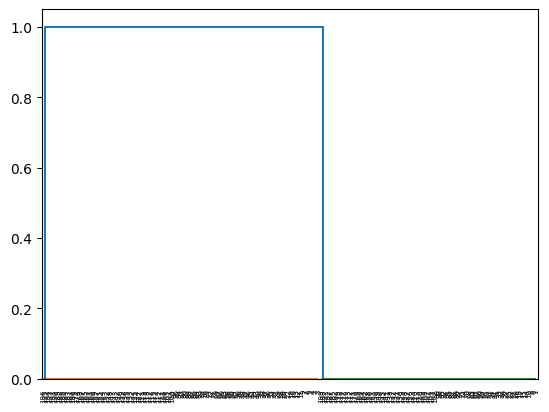

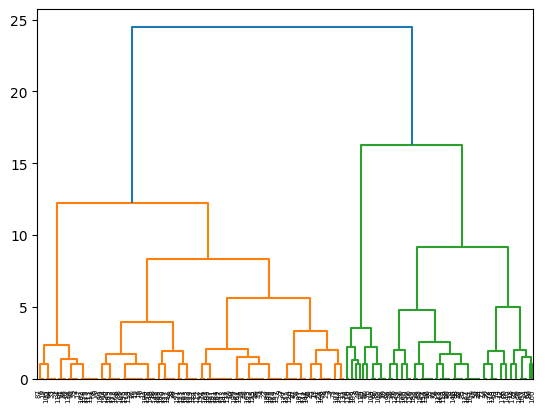

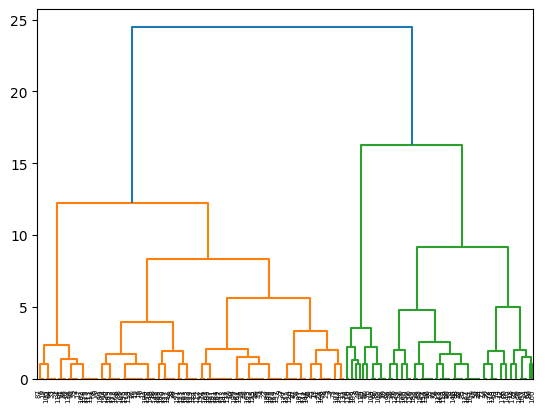

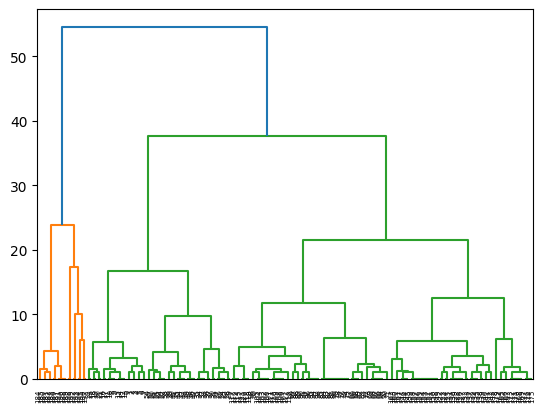

In [23]:
data = pd.read_csv('./SMAI-Dataset-hc-dataset/new_customers.csv')

# Modified Dataframe
data = data.drop(columns='CustomerID')

for col in data.columns:
    print("col = ", col, "Unique Values = ", data[col].nunique())
print(data['Genre'].nunique())
print(data['Age'].nunique())
print(data['Annual Income (k$)'].nunique())
print(data['Spending Score (1-100)'].nunique())
linkage_type_dict = {1 : 'single', 2 : 'complete', 3 : 'average'}

l = [i for i in data]
label_map = {'Genre': 0, 'Age': 1, 'Annual Income (k$)': 2, "Spending Score (1-100)" : 3}
data = np.array(data)
for i in range(data.shape[0]):                          # Transformation is 1 for Male and 0 for Female for Gender Column 
    data[i][0] = 1 if data[i][0] == 'Male' else 0
hc = hierarchical_clustering()

for linkage_type in linkage_type_dict:
    pairs = {}
    for j in l:
        for k in l:
            if (j == k):
                continue
            
            if ((j, k) in pairs or (k, j) in pairs):
                continue

            pairs[(j, k)] = 1
            data_plot = pd.DataFrame(data[:, label_map[j]], data[:, label_map[k]])
            data_plot = np.array([data_plot])
            data_plot = data_plot.reshape((len(data_plot[0]), len(data_plot[0][0])))
            Z = hc.linkages(data_plot, linkage_type_dict[linkage_type])
            hc.dendogram(Z)


### Observations ###

### Linkage Methods
The following Linkage Metrics were used to solve this part.
1. Single Linkage
2. Complete Linkage
3. Average Linkage

### Features Used
The choice of features used significantly impacts the resulting clusters.
For the Purpose of the above part, each feature was analysed pairwise with all the other features. Since there are 4 features, this means 12 times Dendrogram was plotted for different pairwise featues and 3 times for each linkage metric as well.

Dendrogram was plotted for each of the Linkage Metrics.

### 3.1.2 Hierarchical Clustering on Gene Expression Dataset ### 

col =  ID_REF Unique Values =  58
col =  GSM613412 Unique Values =  58
col =  GSM613413 Unique Values =  58
col =  GSM613414 Unique Values =  58
col =  GSM613415 Unique Values =  58
col =  GSM613416 Unique Values =  58
col =  GSM613417 Unique Values =  58
col =  GSM613418 Unique Values =  58
col =  GSM613419 Unique Values =  58
col =  GSM613420 Unique Values =  58
col =  GSM613421 Unique Values =  58
col =  GSM613422 Unique Values =  58
col =  GSM613423 Unique Values =  58


/tmp/ipykernel_5849/2582837261.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


(58, 12)

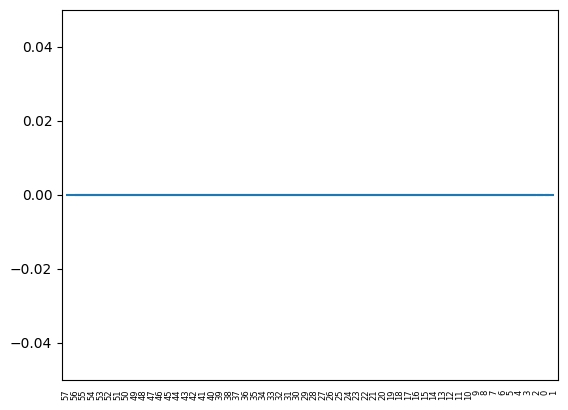

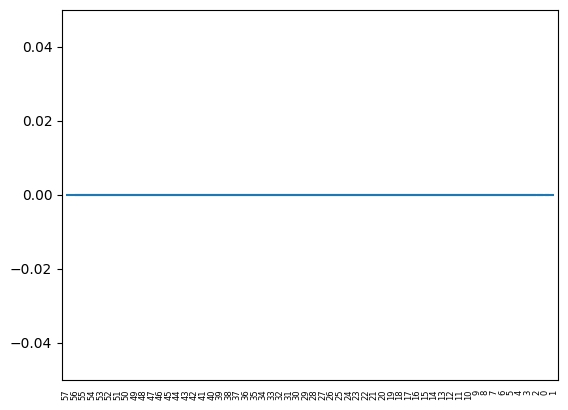

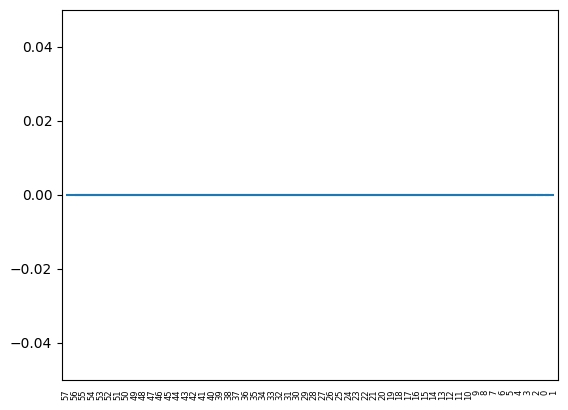

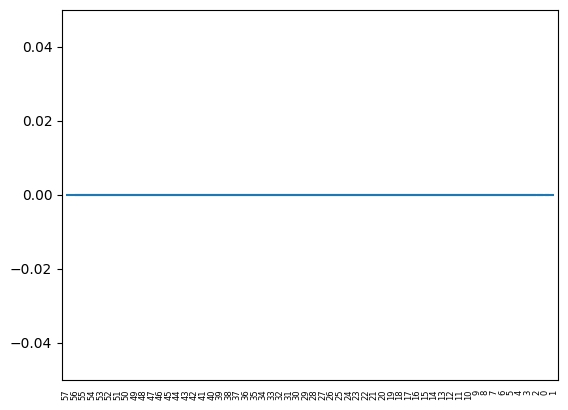

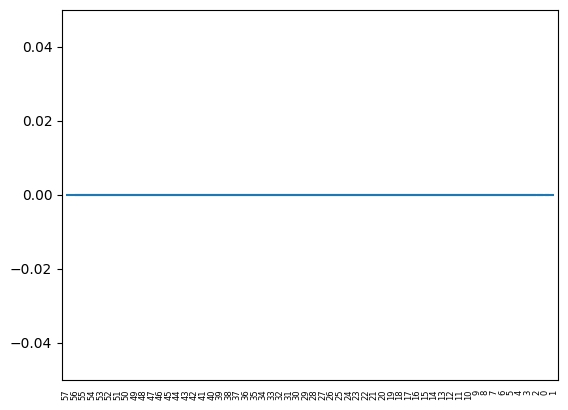

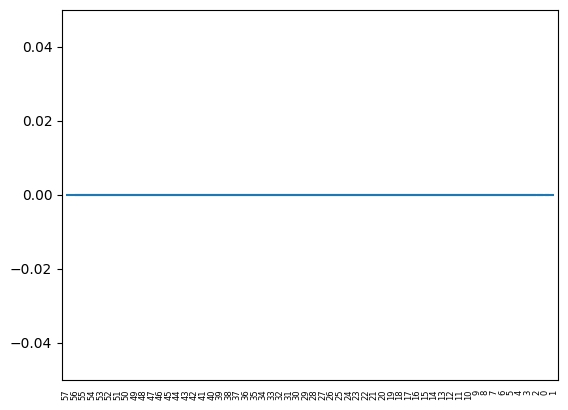

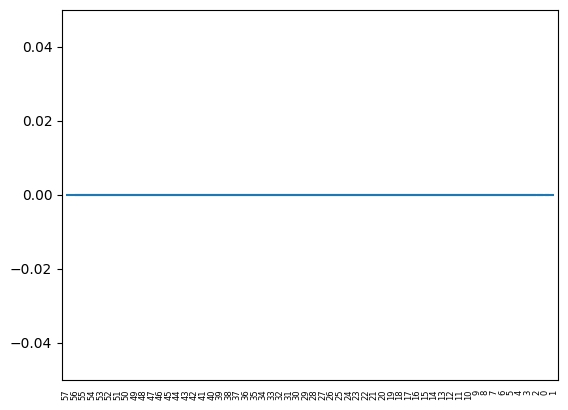

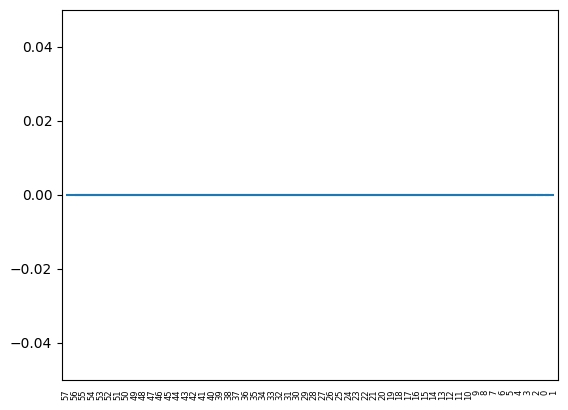

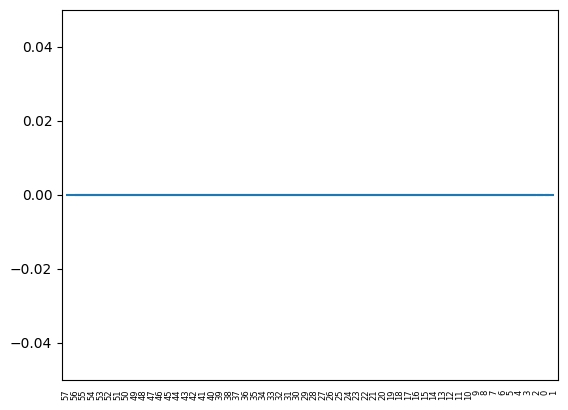

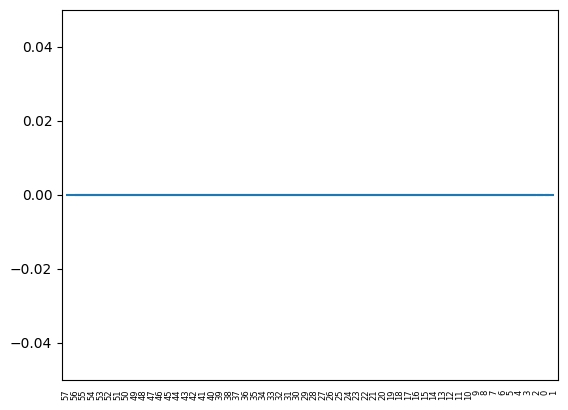

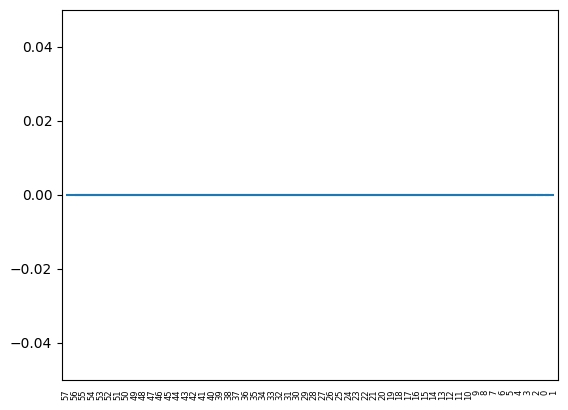

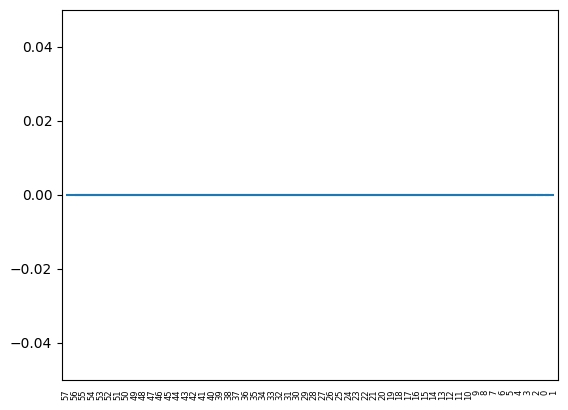

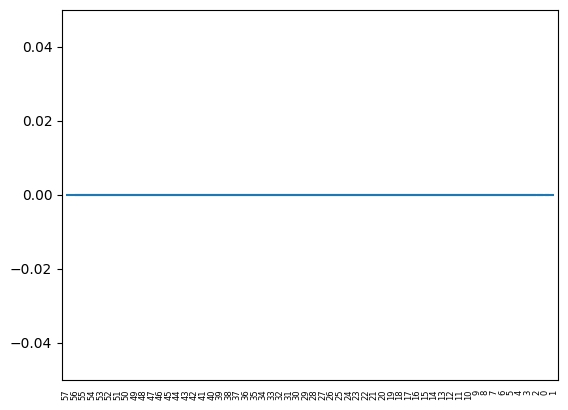

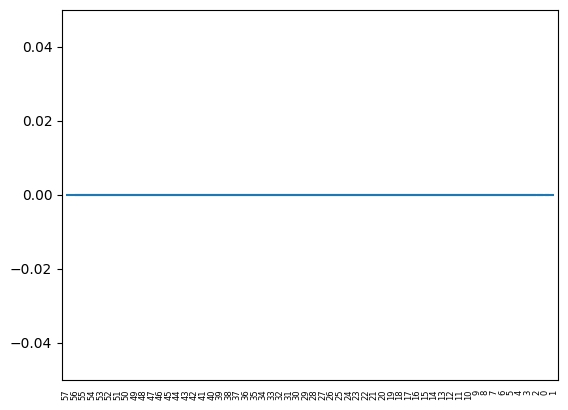

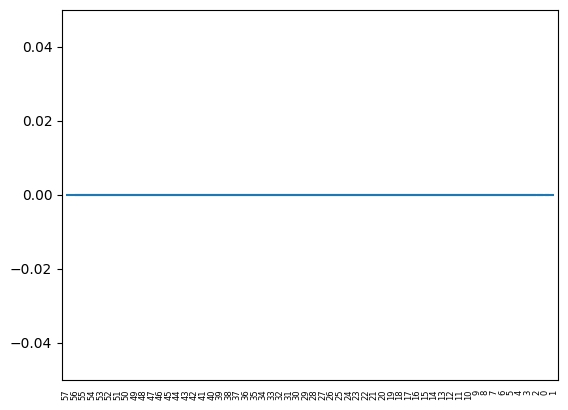

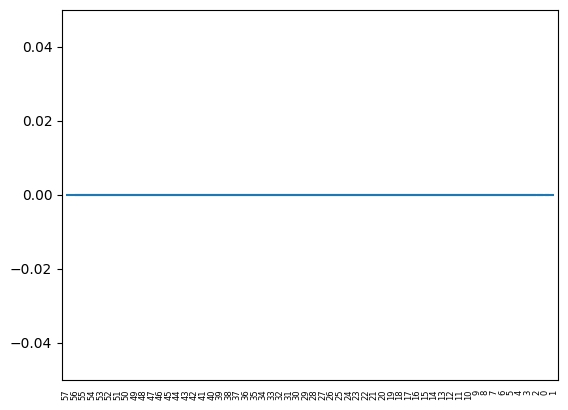

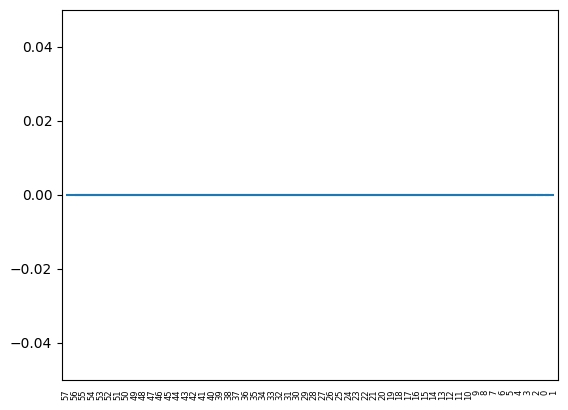

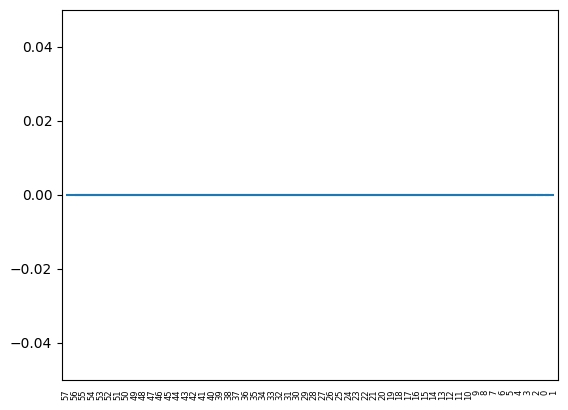

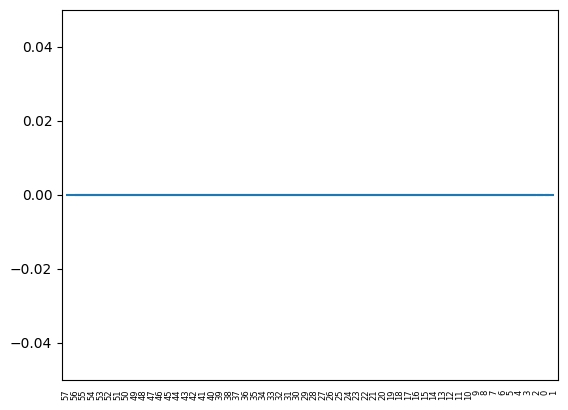

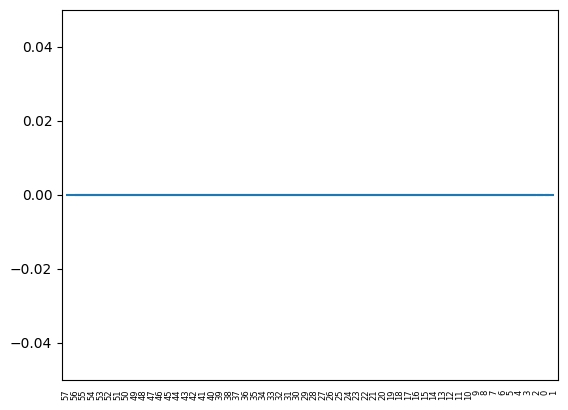

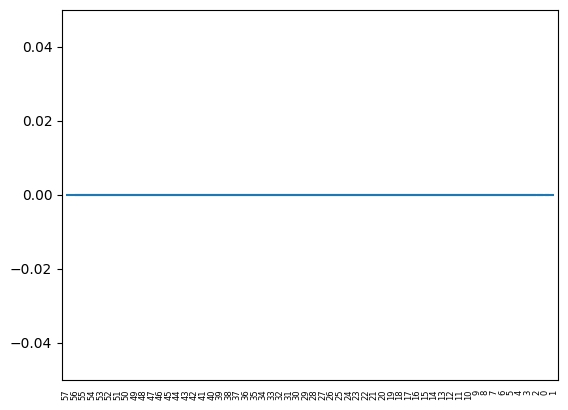

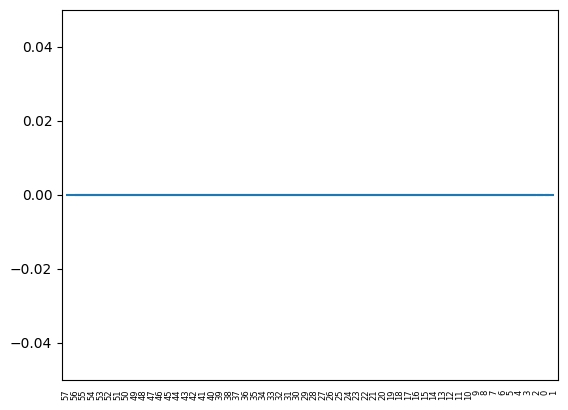

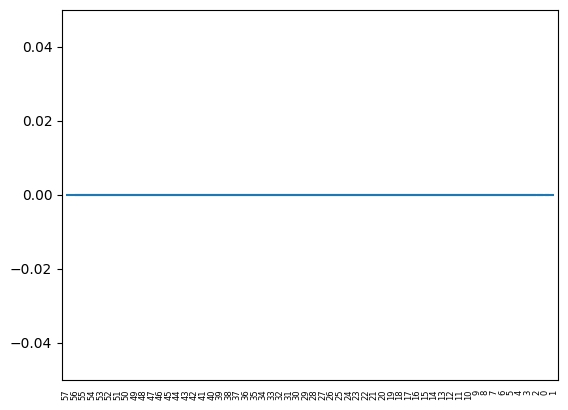

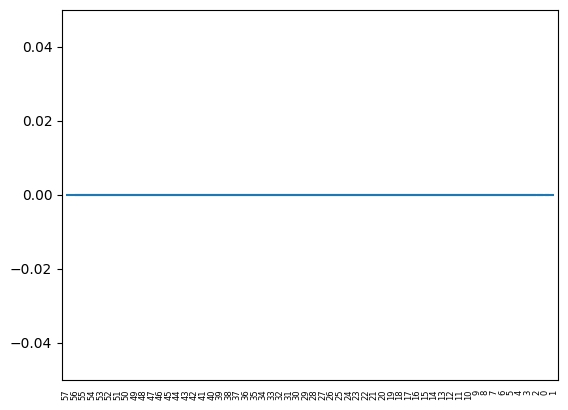

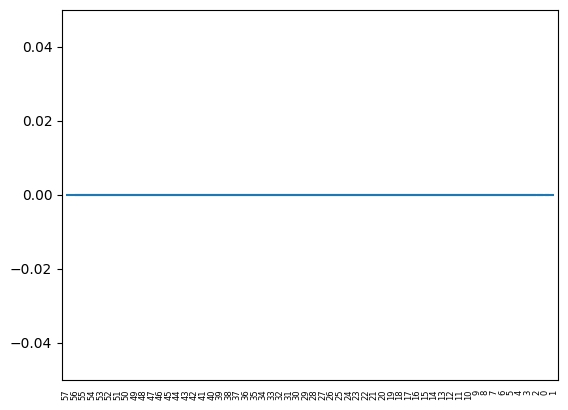

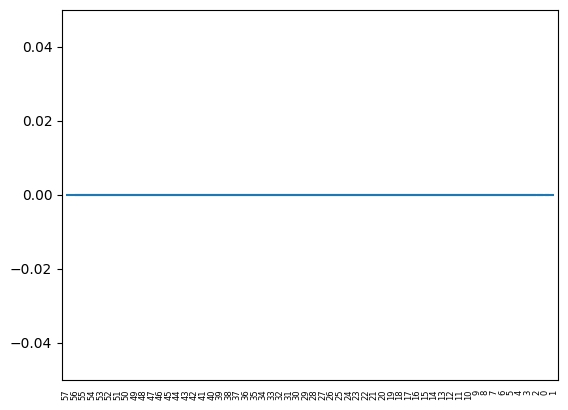

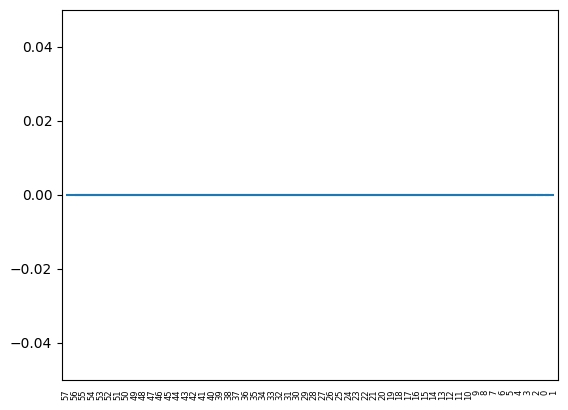

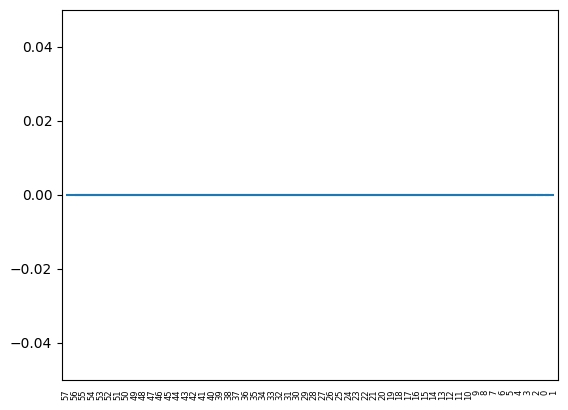

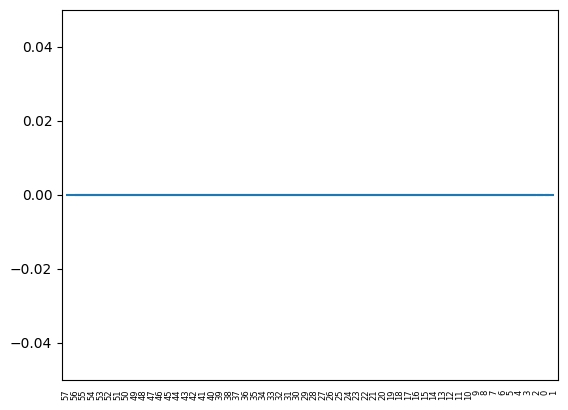

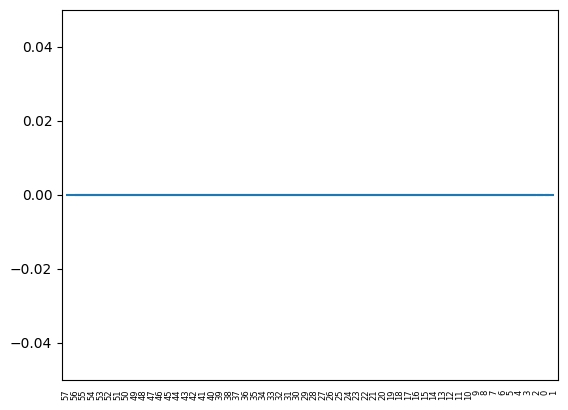

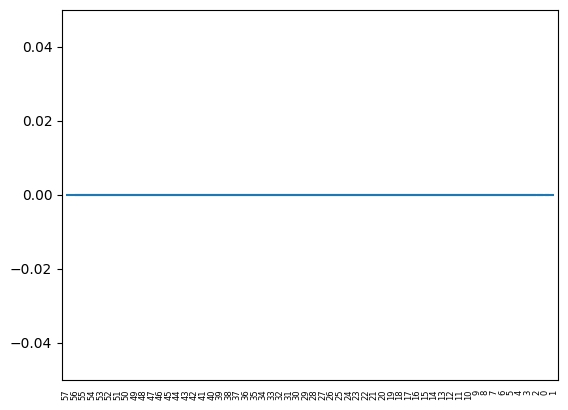

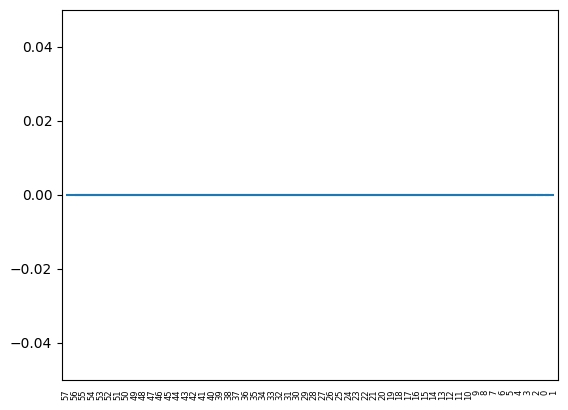

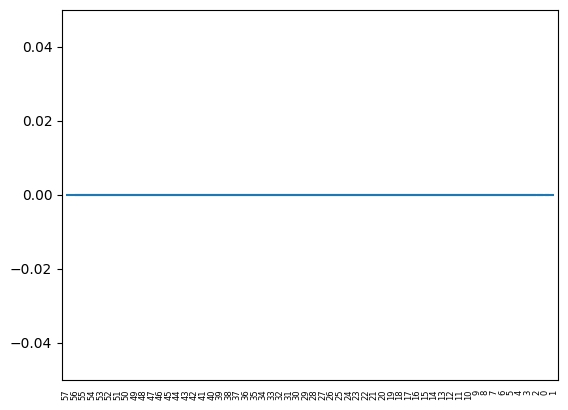

In [18]:
data = pd.read_csv('./SMAI-Dataset-gene-expression/gene.csv')
for col in data.columns:
    print("col = ", col, "Unique Values = ", data[col].nunique())


# data = np.array(data)
# hc = hierarchical_clustering()
# Z_single = hc.linkages(data, linkage_type = 'single')
# hc.dendogram(Z_single)
# Z_complete = hc.linkages(data, linkage_type = 'complete')
# hc.dendogram(Z_complete)
# Z_average= hc.linkages(data, linkage_type = 'average')
# hc.dendogram(Z_average)

data = data.drop(columns=['ID_REF'])

l = [i for i in data]
label_map = {'GSM613413': 1, 'GSM613414': 2, "GSM613415" : 3, "GSM613416": 4, "GSM613417": 5, "GSM613418": 6, "GSM613419": 7, "GSM613420": 8, "GSM613421": 9, "GSM613422": 10, "GSM613423": 11}
data = np.array(data)
for i in range(data.shape[0]):                          # Transformation is 1 for Male and 0 for Female for Gender Column 
    data[i][0] = 1 if data[i][0] == 'Male' else 0
hc = hierarchical_clustering()

for linkage_type in linkage_type_dict:
    for k in l:
        if (k == 'GSM613412'):
            continue
        data_plot = pd.DataFrame(data[:, 0], data[:, label_map[k]])
        data_plot = np.array([data_plot])
        data_plot = data_plot.reshape((len(data_plot[0]), len(data_plot[0][0])))
        Z = hc.linkages(data_plot, linkage_type_dict[linkage_type])
        hc.dendogram(Z)
data.shape

### Observations ###

Linkage Methods:
The choice of linkage method significantly impacts the resulting clusters.
Different linkage methods, including single, complete and average yield varying cluster structures.

Features Used:
The choice of features used for clustering can influence the resulting clusters.
In this gene expression dataset, features correspond to the expression levels of 12 proteins for 58 genes.
The selection of specific proteins or genes as features may result in clusters with different biological interpretations.
What I have done is drawn clusters taking GSM613412 as the feature and varying all other Gene Expressions as other features. Based upon that, Plots were obtained. ID Attribute was dropped.

Dendrogram:
Varying linkage methods and features can lead to different dendrogram structures, affecting cluster interpretation. Dendrogram was also drawn for each linkage matrix.

Overall:
The choice of linkage method and features should align with the specific goals of the analysis and the characteristics of the gene expression dataset. Experimenting with various combinations can provide insights into the underlying biological patterns and relationships among genes and proteins.